In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('E:\\Desktop\\Fintech\\Sample datasets\\Car Selling Price1.csv')

In [3]:
data.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Maruti 800,2005,120000,50000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
1,Maruti Wagon,2005,120000,50000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyundai Verna,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN,NaN
3,Datsun RediGO,2012,430000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
4,Honda Amaze,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [5]:
data=data.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],axis=1)

In [6]:
data.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2005,120000,50000,Diesel,Individual,Manual,Second Owner
1,Maruti Wagon,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Hyundai Verna,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Datsun RediGO,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Honda Amaze,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner


In [7]:
data.shape

(4340, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
Name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.3+ KB


In [9]:
data['Name'].value_counts()

Maruti Swift             320
Maruti Alto              258
Maruti Wagon             164
Hyundai i20              132
Hyundai Verna            129
Hyundai Grand            112
Hyundai Santro           111
Toyota Innova            102
Hyundai EON              100
Tata Indica               98
Mahindra Scorpio          94
Honda City                93
Ford Figo                 84
Hyundai i10               80
Chevrolet Beat            76
Mahindra XUV500           73
Maruti Ertiga             68
Mahindra Bolero           67
Renault KWID              66
Tata Indigo               63
Maruti Zen                59
Maruti 800                59
Honda Amaze               58
Hyundai Creta             54
Renault Duster            54
Maruti Baleno             51
Toyota Etios              49
Maruti SX4                45
Volkswagen Polo           41
Maruti Ciaz               39
                        ... 
Fiat 500                   1
Daewoo Matiz               1
Ford Fusion                1
Toyota Qualis 

In [10]:
data['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [11]:
data['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [12]:
data['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [13]:
data['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [14]:
data['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
Name             4340 non-null object
year             4340 non-null int64
selling_price    4340 non-null int64
km_driven        4340 non-null int64
fuel             4340 non-null object
seller_type      4340 non-null object
transmission     4340 non-null object
owner            4340 non-null object
dtypes: int64(3), object(5)
memory usage: 271.3+ KB


(array([2.670e+03, 1.238e+03, 2.380e+02, 7.300e+01, 2.900e+01, 2.800e+01,
        1.900e+01, 6.000e+00, 1.600e+01, 3.000e+00, 6.000e+00, 1.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([  20000.,  464000.,  908000., 1352000., 1796000., 2240000.,
        2684000., 3128000., 3572000., 4016000., 4460000., 4904000.,
        5348000., 5792000., 6236000., 6680000., 7124000., 7568000.,
        8012000., 8456000., 8900000.]),
 <a list of 20 Patch objects>)

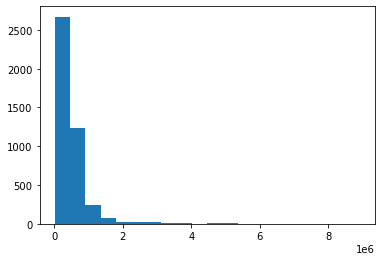

In [16]:
plt.hist(data['selling_price'],bins=20)

In [17]:
a=data['selling_price']/100000

(array([2.670e+03, 1.238e+03, 2.380e+02, 7.300e+01, 2.900e+01, 2.800e+01,
        1.900e+01, 6.000e+00, 1.600e+01, 3.000e+00, 6.000e+00, 1.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.2 ,  4.64,  9.08, 13.52, 17.96, 22.4 , 26.84, 31.28, 35.72,
        40.16, 44.6 , 49.04, 53.48, 57.92, 62.36, 66.8 , 71.24, 75.68,
        80.12, 84.56, 89.  ]),
 <a list of 20 Patch objects>)

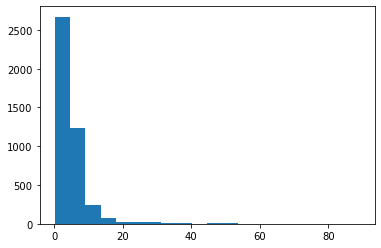

In [18]:
plt.hist(a,bins=20)

In [19]:
data.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2005,120000,50000,Diesel,Individual,Manual,Second Owner
1,Maruti Wagon,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2,Hyundai Verna,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3,Datsun RediGO,2012,430000,50000,Petrol,Individual,Manual,Second Owner
4,Honda Amaze,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner


(array([1.392e+03, 1.700e+03, 9.460e+02, 1.670e+02, 7.800e+01, 3.000e+01,
        1.200e+01, 8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.000000e+00, 4.033090e+04, 8.066080e+04, 1.209907e+05,
        1.613206e+05, 2.016505e+05, 2.419804e+05, 2.823103e+05,
        3.226402e+05, 3.629701e+05, 4.033000e+05, 4.436299e+05,
        4.839598e+05, 5.242897e+05, 5.646196e+05, 6.049495e+05,
        6.452794e+05, 6.856093e+05, 7.259392e+05, 7.662691e+05,
        8.065990e+05]),
 <a list of 20 Patch objects>)

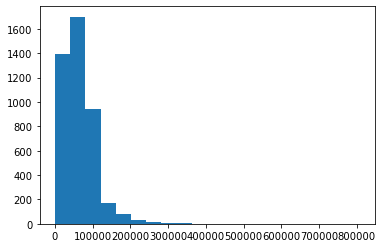

In [20]:
plt.hist(data['km_driven'],bins=20)

In [21]:
from sklearn import preprocessing

In [22]:
data['selling_price_Std']=preprocessing.scale(data['selling_price'])

In [23]:
data['selling_price_Std'].head()

0   -0.664026
1   -0.664026
2   -0.785033
3   -0.128141
4    1.202929
Name: selling_price_Std, dtype: float64

(array([2.670e+03, 1.238e+03, 2.380e+02, 7.300e+01, 2.900e+01, 2.800e+01,
        1.900e+01, 6.000e+00, 1.600e+01, 3.000e+00, 6.000e+00, 1.100e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-0.8368925 , -0.06936656,  0.69815938,  1.46568531,  2.23321125,
         3.00073719,  3.76826313,  4.53578906,  5.303315  ,  6.07084094,
         6.83836687,  7.60589281,  8.37341875,  9.14094469,  9.90847062,
        10.67599656, 11.4435225 , 12.21104844, 12.97857437, 13.74610031,
        14.51362625]),
 <a list of 20 Patch objects>)

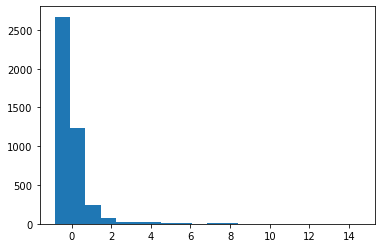

In [24]:
plt.hist(data['selling_price_Std'],bins=20)

In [25]:
data.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price_Std'],
      dtype='object')

In [26]:
data['km_driven_std']=preprocessing.scale(data['km_driven'])

(array([1.392e+03, 1.700e+03, 9.460e+02, 1.670e+02, 7.800e+01, 3.000e+01,
        1.200e+01, 8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.41973806, -0.55500822,  0.30972162,  1.17445146,  2.03918131,
         2.90391115,  3.76864099,  4.63337083,  5.49810067,  6.36283051,
         7.22756036,  8.0922902 ,  8.95702004,  9.82174988, 10.68647972,
        11.55120956, 12.41593941, 13.28066925, 14.14539909, 15.01012893,
        15.87485877]),
 <a list of 20 Patch objects>)

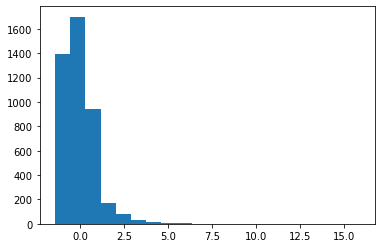

In [27]:
plt.hist(data['km_driven_std'],bins=20)

In [28]:
data.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_Std,km_driven_std
0,Maruti 800,2005,120000,50000,Diesel,Individual,Manual,Second Owner,-0.664026,-0.347689
1,Maruti Wagon,2005,120000,50000,Diesel,Individual,Manual,Second Owner,-0.664026,-0.347689
2,Hyundai Verna,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,-0.785033,1.153209
3,Datsun RediGO,2012,430000,50000,Petrol,Individual,Manual,Second Owner,-0.128141,-0.347689
4,Honda Amaze,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner,1.202929,-0.133275


In [29]:
data['selling_price_Std'].min()

-0.8368924970069058

In [30]:
data['selling_price_Std'].max()

14.513626246792594

In [31]:
data.isna().any()

Name                 False
year                 False
selling_price        False
km_driven            False
fuel                 False
seller_type          False
transmission         False
owner                False
selling_price_Std    False
km_driven_std        False
dtype: bool

In [ ]:
data.isnull().sum()

In [32]:
#Outliers

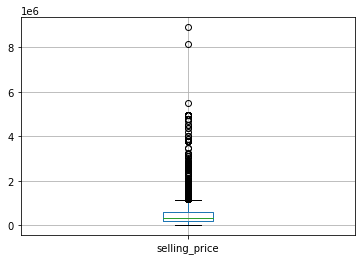

In [33]:
data.boxplot('selling_price')

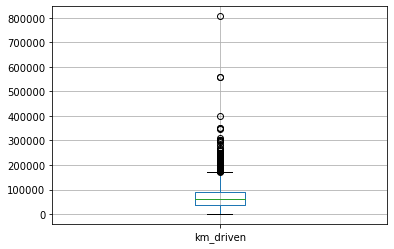

In [34]:
data.boxplot('km_driven')

In [35]:
data.describe()

,year,selling_price,km_driven,selling_price_Std,km_driven_std
count,4340.000000,4.340000e+03,4340.000000,4.340000e+03,4.340000e+03
mean,2013.090783,5.041273e+05,66215.777419,-4.706936e-16,-5.331117e-17
std,4.215344,5.785487e+05,46644.102194,1.000115e+00,1.000115e+00
min,1992.000000,2.000000e+04,1.000000,-8.368925e-01,-1.419738e+00
25%,2011.000000,2.087498e+05,35000.000000,-5.106080e-01,-6.693102e-01
50%,2014.000000,3.500000e+05,60000.000000,-2.664340e-01,-1.332750e-01
75%,2016.000000,6.000000e+05,90000.000000,1.657315e-01,5.099672e-01
max,2020.000000,8.900000e+06,806599.000000,1.451363e+01,1.587486e+01


In [36]:
#Outlier value for km-driven(Q3+1.5*IQR)
90+(1.5*(90-35))

172.5

In [37]:
#Outlier value for selling price(Q3+1.5*IQR)
(6+(1.5*(6-2.08)))*100000

1188000.0

In [38]:
out=data[data['km_driven']>172500]

In [39]:
data.shape

(4340, 10)

In [40]:
(110/4340)*100

2.5345622119815667

In [41]:
data1=data[data['km_driven']<=172500]

In [42]:
data1.shape

(4230, 10)

In [43]:
data1.describe()

,year,selling_price,km_driven,selling_price_Std,km_driven_std
count,4230.000000,4.230000e+03,4230.000000,4230.000000,4230.000000
mean,2013.163357,5.073197e+05,61908.516312,0.005519,-0.092354
std,4.217096,5.841001e+05,36303.611548,1.009712,0.778401
min,1992.000000,2.000000e+04,1.000000,-0.836892,-1.419738
25%,2011.000000,2.100000e+05,34400.000000,-0.508447,-0.682175
50%,2014.000000,3.570000e+05,59352.000000,-0.254333,-0.147169
75%,2017.000000,6.000000e+05,88352.500000,0.165731,0.474643
max,2020.000000,8.900000e+06,172000.000000,14.513626,2.268163


In [44]:
(6+(1.5*(6-2.1)))*100000

1185000.0

In [45]:
data2=data1[data1['selling_price']<=1185000]

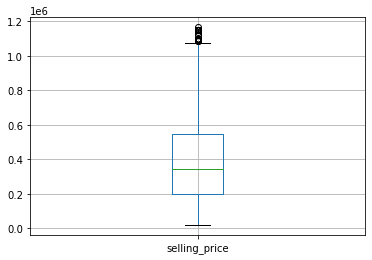

In [46]:
data2.boxplot('selling_price')

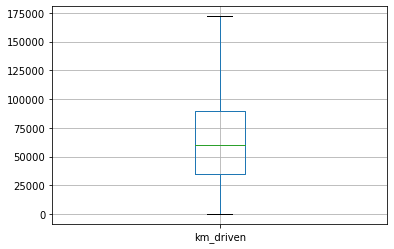

In [47]:
data2.boxplot('km_driven')

In [48]:
data2.shape

(3962, 10)

(array([171., 414., 369., 370., 506., 304., 264., 241., 267., 178., 190.,
        201., 122.,  96.,  72.,  56.,  38.,  58.,  25.,  20.]),
 array([  20000.,   77250.,  134500.,  191750.,  249000.,  306250.,
         363500.,  420750.,  478000.,  535250.,  592500.,  649750.,
         707000.,  764250.,  821500.,  878750.,  936000.,  993250.,
        1050500., 1107750., 1165000.]),
 <a list of 20 Patch objects>)

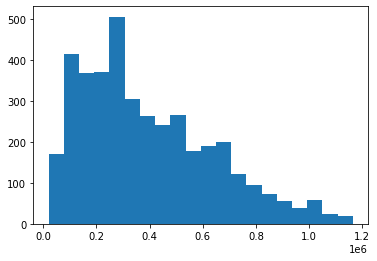

In [49]:
#To check the shape of the data
plt.hist(data2['selling_price'],bins=20)

(array([156., 248., 298., 234., 368., 395., 428., 142., 343., 305., 242.,
        226., 158., 238.,  25.,  38.,  39.,  29.,  30.,  20.]),
 array([1.0000000e+00, 8.6009500e+03, 1.7200900e+04, 2.5800850e+04,
        3.4400800e+04, 4.3000750e+04, 5.1600700e+04, 6.0200650e+04,
        6.8800600e+04, 7.7400550e+04, 8.6000500e+04, 9.4600450e+04,
        1.0320040e+05, 1.1180035e+05, 1.2040030e+05, 1.2900025e+05,
        1.3760020e+05, 1.4620015e+05, 1.5480010e+05, 1.6340005e+05,
        1.7200000e+05]),
 <a list of 20 Patch objects>)

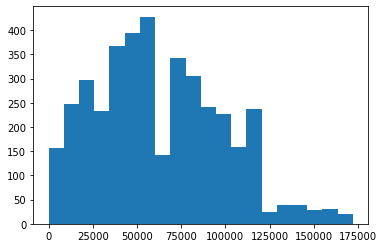

In [50]:
plt.hist(data2['km_driven'],bins=20)

In [51]:
data3=data2[data2['km_driven']<120000]

(array([110., 146., 150., 173., 197., 254., 244., 145., 345., 154., 305.,
        293.,  96., 280.,  50., 223., 211.,  27., 142.,  18.]),
 array([1.0000000e+00, 5.9509500e+03, 1.1900900e+04, 1.7850850e+04,
        2.3800800e+04, 2.9750750e+04, 3.5700700e+04, 4.1650650e+04,
        4.7600600e+04, 5.3550550e+04, 5.9500500e+04, 6.5450450e+04,
        7.1400400e+04, 7.7350350e+04, 8.3300300e+04, 8.9250250e+04,
        9.5200200e+04, 1.0115015e+05, 1.0710010e+05, 1.1305005e+05,
        1.1900000e+05]),
 <a list of 20 Patch objects>)

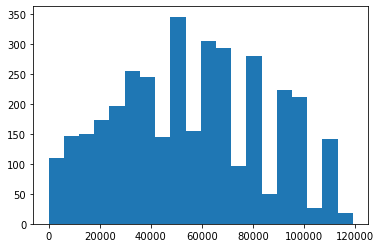

In [52]:
plt.hist(data3['km_driven'],bins=20)

In [53]:
data3.shape

(3563, 10)

In [54]:
3563/4340

0.8209677419354838

In [55]:
#To calculate skewness
data3['km_driven'].skew()

0.08810899212240429

In [56]:
#To calculate Kurtosis
data3['km_driven'].kurt()

-0.9100343648775788

In [57]:
#To calculate skewness
data3['selling_price'].skew()

0.7348466715528711

In [58]:
#To calculate Kurtosis
data3['selling_price'].kurt()

-0.12613868641485215

In [59]:
#Check for missing values
data3.isna().any()

Name                 False
year                 False
selling_price        False
km_driven            False
fuel                 False
seller_type          False
transmission         False
owner                False
selling_price_Std    False
km_driven_std        False
dtype: bool

In [60]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 4335
Data columns (total 10 columns):
Name                 3563 non-null object
year                 3563 non-null int64
selling_price        3563 non-null int64
km_driven            3563 non-null int64
fuel                 3563 non-null object
seller_type          3563 non-null object
transmission         3563 non-null object
owner                3563 non-null object
selling_price_Std    3563 non-null float64
km_driven_std        3563 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 306.2+ KB


In [61]:
#Check for multicollinearity
data3.corr()

,year,selling_price,km_driven,selling_price_Std,km_driven_std
year,1.000000,0.628701,-0.474996,0.628701,-0.474996
selling_price,0.628701,1.000000,-0.298055,1.000000,-0.298055
km_driven,-0.474996,-0.298055,1.000000,-0.298055,1.000000
selling_price_Std,0.628701,1.000000,-0.298055,1.000000,-0.298055
km_driven_std,-0.474996,-0.298055,1.000000,-0.298055,1.000000


In [62]:
data3.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price_Std', 'km_driven_std'],
      dtype='object')

In [63]:
data3a=data.drop(['Name', 'year', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price_Std', 'km_driven_std'],axis=1)

In [64]:
data3a.head()

,selling_price,km_driven
0,120000,50000
1,120000,50000
2,50000,120000
3,430000,50000
4,1200000,60000


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif["variables"] = data3a.columns
vif["VIF"] = [variance_inflation_factor(data3a.values, i) for i in range (data3a.shape[1])]

In [67]:
vif

,variables,VIF
0,selling_price,1.259132
1,km_driven,1.259132


In [68]:
data3.shape

(3563, 10)

In [69]:
#Frequencies
data3['Name'].value_counts()

Maruti Swift              261
Maruti Alto               210
Maruti Wagon              140
Hyundai i20               107
Hyundai Verna             103
Hyundai Grand              99
Hyundai Santro             94
Tata Indica                88
Toyota Innova              88
Hyundai EON                80
Mahindra Scorpio           80
Honda City                 74
Ford Figo                  72
Hyundai i10                68
Chevrolet Beat             68
Mahindra XUV500            61
Renault KWID               60
Maruti Ertiga              60
Mahindra Bolero            58
Tata Indigo                54
Maruti 800                 50
Maruti Zen                 47
Renault Duster             44
Hyundai Creta              43
Maruti Baleno              42
Honda Amaze                42
Maruti SX4                 38
Volkswagen Polo            36
Volkswagen Vento           34
Toyota Etios               34
                         ... 
Fiat 500                    1
Ford Classic                1
Daewoo Mat

In [70]:
data3['fuel'].value_counts()

Petrol      1986
Diesel      1518
CNG           39
LPG           19
Electric       1
Name: fuel, dtype: int64

In [71]:
data3['seller_type'].value_counts()

Individual          2643
Dealer               831
Trustmark Dealer      89
Name: seller_type, dtype: int64

In [72]:
data3['transmission'].value_counts()

Manual       3322
Automatic     241
Name: transmission, dtype: int64

In [73]:
data3['owner'].value_counts()

First Owner             2378
Second Owner             902
Third Owner              207
Fourth & Above Owner      62
Test Drive Car            14
Name: owner, dtype: int64

In [74]:
data3.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price_Std', 'km_driven_std'],
      dtype='object')

In [75]:
#To drop Name variable because of 150+ categories
data4=data3.drop(['Name'],axis=1)

In [76]:
#To derive new variable duration based on the car model
data4['duration']=2020-data3['year']

In [77]:
data4.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,selling_price_Std,km_driven_std,duration
0,2005,120000,50000,Diesel,Individual,Manual,Second Owner,-0.664026,-0.347689,15
1,2005,120000,50000,Diesel,Individual,Manual,Second Owner,-0.664026,-0.347689,15
3,2012,430000,50000,Petrol,Individual,Manual,Second Owner,-0.128141,-0.347689,8
6,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner,1.116496,-0.283365,7
7,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner,1.116496,-0.283365,7


In [78]:
data4=data4.drop(['year','selling_price_Std','km_driven_std'],axis=1)

In [79]:
data4.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,duration
0,120000,50000,Diesel,Individual,Manual,Second Owner,15
1,120000,50000,Diesel,Individual,Manual,Second Owner,15
3,430000,50000,Petrol,Individual,Manual,Second Owner,8
6,1150000,53000,Diesel,Dealer,Automatic,First Owner,7
7,1150000,53000,Diesel,Dealer,Automatic,First Owner,7


In [278]:
#To get dummies
data5=pd.get_dummies(data4)

In [81]:
data5.shape

(3563, 18)

In [82]:
#Modeling dataset
data5.head()

,selling_price,km_driven,duration,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,120000,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,120000,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,430000,50000,8,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
6,1150000,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
7,1150000,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [83]:
data5.shape

(3563, 18)

In [84]:
data5.columns

Index(['selling_price', 'km_driven', 'duration', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [86]:
#Split the data into dependent & Independent variables
y=data5.drop(['km_driven', 'duration', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],axis=1)
x=data5.drop(['selling_price'],axis=1)

In [87]:
x.head()

,km_driven,duration,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,50000,8,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
6,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
7,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [88]:
y.head()

,selling_price
0,120000
1,120000
3,430000
6,1150000
7,1150000


In [89]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=90)

In [159]:
x_train.shape

(2494, 17)

In [160]:
y_train.shape

(2494, 1)

In [161]:
type(y_train)

pandas.core.frame.DataFrame

In [162]:
y_train=pd.DataFrame(y_train)

In [163]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [165]:
#Fitting the model to train data
model=regr.fit(x_train,y_train)

In [166]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
model.coef_

array([[-7.83686152e-01, -2.84963505e+04, -4.31720419e+04,
         1.38934671e+05, -8.73114914e-11, -6.49519837e+04,
        -3.08106452e+04, -5.27263852e+04, -7.35988934e+04,
         1.26325279e+05,  8.41611035e+04, -8.41611035e+04,
        -3.21175209e+04, -4.42282718e+04, -5.81730423e+04,
         2.17486903e+05, -8.29680684e+04]])

In [168]:
#Predict the test data results
y_testpred=model.predict(x_test)

In [169]:
y_testpred=pd.DataFrame(y_testpred)

In [170]:
mean_squared_error(y_test,y_testpred)

27840126829.77204

In [171]:
np.sqrt(mean_squared_error(y_test,y_testpred))

166853.6089803635

In [172]:
r2_score(y_test,y_testpred)

0.5473349757026391

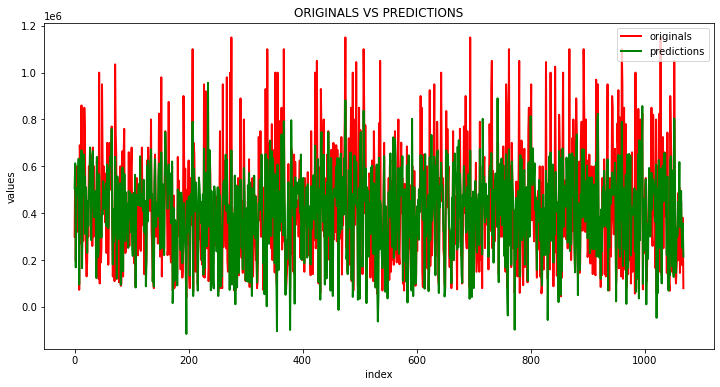

In [173]:
test_index=y_test.reset_index()["selling_price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=y_testpred[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()

In [280]:
data5.head()

,selling_price,km_driven,duration,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,120000,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,120000,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,430000,50000,8,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
6,1150000,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
7,1150000,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [281]:
data5.shape

(3563, 18)

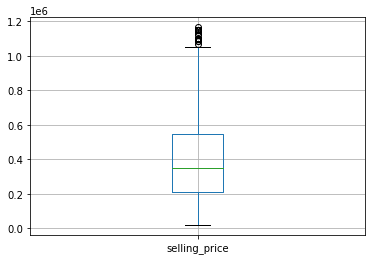

In [279]:
data5.boxplot(['selling_price'])

In [282]:
data5['selling_price'].skew()

0.7348466715528711

(array([147., 340., 316., 336., 447., 270., 242., 215., 245., 172., 177.,
        189., 118.,  92.,  70.,  56.,  34.,  55.,  23.,  19.]),
 array([  20000.,   77250.,  134500.,  191750.,  249000.,  306250.,
         363500.,  420750.,  478000.,  535250.,  592500.,  649750.,
         707000.,  764250.,  821500.,  878750.,  936000.,  993250.,
        1050500., 1107750., 1165000.]),
 <a list of 20 Patch objects>)

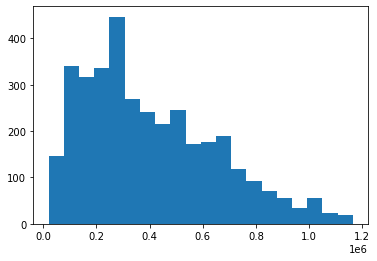

In [283]:
plt.hist(data5['selling_price'],bins=20)

In [284]:
a=np.log(data5['selling_price'])

(array([  2.,   1.,   3.,  17.,  21.,  37., 117., 108., 110., 206., 161.,
        253., 351., 335., 380., 374., 416., 332., 236., 103.]),
 array([ 9.90348755, 10.10672476, 10.30996196, 10.51319917, 10.71643637,
        10.91967358, 11.12291078, 11.32614798, 11.52938519, 11.73262239,
        11.9358596 , 12.1390968 , 12.34233401, 12.54557121, 12.74880842,
        12.95204562, 13.15528283, 13.35852003, 13.56175724, 13.76499444,
        13.96823164]),
 <a list of 20 Patch objects>)

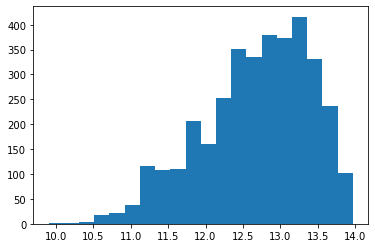

In [285]:
plt.hist(a,bins=20)

In [291]:
data5['selling_price']=np.sqrt(data5['selling_price'])

(array([  6.,  38., 108., 166., 210., 209., 246., 322., 311., 272., 266.,
        215., 311., 215., 209., 147., 128.,  83.,  59.,  42.]),
 array([ 141.42135624,  188.31787129,  235.21438634,  282.11090139,
         329.00741644,  375.90393149,  422.80044654,  469.69696159,
         516.59347664,  563.48999169,  610.38650674,  657.28302179,
         704.17953684,  751.07605189,  797.97256694,  844.86908199,
         891.76559704,  938.66211209,  985.55862715, 1032.4551422 ,
        1079.35165725]),
 <a list of 20 Patch objects>)

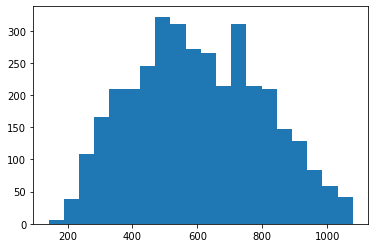

In [292]:
plt.hist(data5['selling_price'],bins=20)

In [293]:
data5['selling_price'].skew()

0.14376453194217823

(array([110., 146., 150., 173., 197., 254., 244., 145., 345., 154., 305.,
        293.,  96., 280.,  50., 223., 211.,  27., 142.,  18.]),
 array([1.0000000e+00, 5.9509500e+03, 1.1900900e+04, 1.7850850e+04,
        2.3800800e+04, 2.9750750e+04, 3.5700700e+04, 4.1650650e+04,
        4.7600600e+04, 5.3550550e+04, 5.9500500e+04, 6.5450450e+04,
        7.1400400e+04, 7.7350350e+04, 8.3300300e+04, 8.9250250e+04,
        9.5200200e+04, 1.0115015e+05, 1.0710010e+05, 1.1305005e+05,
        1.1900000e+05]),
 <a list of 20 Patch objects>)

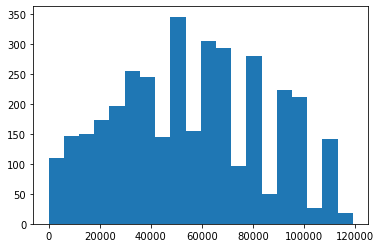

In [295]:
plt.hist(data5['km_driven'],bins=20)

In [296]:
data5['km_driven'].skew()

0.08810899212240429

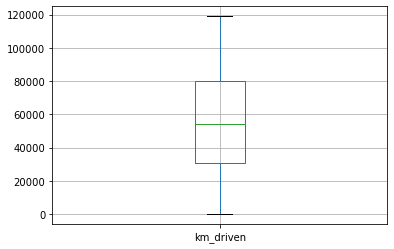

In [297]:
data5.boxplot(['km_driven'])

In [298]:
data5['duration'].skew()

0.9344578102540857

(array([193., 303., 728., 380., 297., 643., 204., 327., 112., 110., 143.,
         32.,  36.,  19.,  11.,  19.,   2.,   3.,   0.,   1.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ,
        15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 20 Patch objects>)

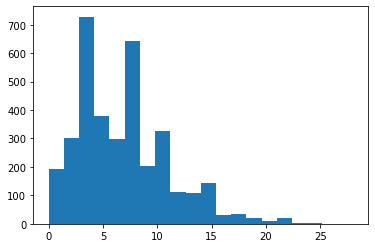

In [300]:
plt.hist(data5['duration'],bins=20)

In [305]:
data5['duration_log']=np.log(data5['duration']+1)

(array([ 40.,   0.,   0.,   0., 153.,   0., 303.,   0., 406., 322., 380.,
        297., 310., 537., 327., 222., 175.,  55.,  32.,   4.]),
 array([0.        , 0.16836479, 0.33672958, 0.50509437, 0.67345917,
        0.84182396, 1.01018875, 1.17855354, 1.34691833, 1.51528312,
        1.68364791, 1.85201271, 2.0203775 , 2.18874229, 2.35710708,
        2.52547187, 2.69383666, 2.86220146, 3.03056625, 3.19893104,
        3.36729583]),
 <a list of 20 Patch objects>)

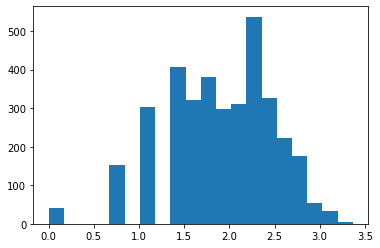

In [306]:
plt.hist(data5['duration_log'],bins=20)

In [307]:
data5['duration_log'].skew()

-0.5005154917795265

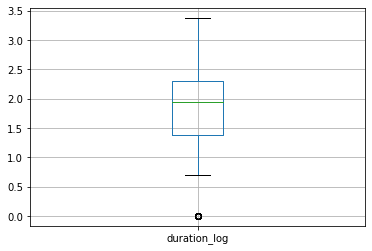

In [308]:
data5.boxplot(['duration_log'])

In [309]:
data5.head()

,selling_price,km_driven,duration,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,duration_log
0,346.410162,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,2.772589
1,346.410162,50000,15,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,2.772589
3,655.743852,50000,8,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.197225
6,1072.380529,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,2.079442
7,1072.380529,53000,7,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,2.079442


In [310]:
data6=data5.drop(['duration'],axis=1)

In [313]:
data6.head()
data6.shape

(3563, 18)

In [314]:
data6.columns

Index(['selling_price', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'duration_log'],
      dtype='object')

In [316]:
y=data6.drop(['km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'duration_log'],axis=1)

In [317]:
x=data6.drop(['selling_price'],axis=1)

In [319]:
x.shape

(3563, 17)

In [320]:
y.shape

(3563, 1)

In [337]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=27)

In [338]:
x_train.shape

(2494, 17)

In [1]:
y_train.shape

NameError: name 'y_train' is not defined

In [339]:
x_test.shape

(1069, 17)

In [340]:
regr=linear_model.LinearRegression()

In [341]:
model1=regr.fit(x_train,y_train)

In [342]:
testpred=model1.predict(x_test)

In [343]:
type(testpred)

numpy.ndarray

In [344]:
testpred=pd.DataFrame(testpred)

In [345]:
type(testpred)

pandas.core.frame.DataFrame

In [346]:
r2_score(y_test,testpred)

0.6148711705749454

In [347]:
mean_squared_error(y_test,testpred)

15426.689268689373

In [348]:
np.sqrt(mean_squared_error(y_test,testpred))

124.20422403722577